## Studies the ratios
- automatically search for polynomial order of the best fitting curve?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
import astropy.wcs as wcs

import sys
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
import astropy.wcs as wcs

import sys

import os

# CAN ALSO WORK WITH PYPATH
sys.path.insert(0,'libraries/')
import ratio_density as rat

import os

# CAN ALSO WORK WITH PYPATH
sys.path.insert(0,'libraries/')
import ratio_density as rat

In [2]:
## input ##

## for the fits files to open
file_name_1 = 'Ipeak_4sigmaMusca_C18O21_TP_kelvin_Smto10'
path_1 = '../data/ALMA/fitting_results/'
label_1 = 'C$^{18}$O(2-1)'

file_name_2 = 'Ipeak_4sigmaMusca_C18O10_TP_kelvin'
path_2 = '../data/ALMA/fitting_results/'
label_2 = 'C$^{18}$O(1-0)'

file_name_cont = 'musca_coldens_high250_clean_2d'
path_cont = '../data/Herschel/'
label_cont = 'N$_{H_{2}}$ (cm$^{-2}$)'

## contour information
levs_cont = [2.0e21 + i*1.0e21 for i in range(0,6)]
wids_cont = [0.7 for lev in levs_cont]

## saving ratio map in fits format
path_save_ratio_fits = '../data/results/'
name_save_ratio = 'ratio_Ipeak_C18O21-C18O10_4sigma'


## plotting information for the ratio map
max_ratio = 1.1 ## Set to None if you do not want to use it
label_map = 'T$_{C^{18}O(2-1)}$/T$_{C^{18}O(1-0)}$'
x1_pl = 60.
x2_pl = 300.
y1_pl = 25.
y2_pl = 345.
path_save_ratio = '../plots/ALMA_c18o21-10_ratio/'
path_ratio_map_fig = path_save_ratio+name_save_ratio+'.pdf'

## information for the density calculation (fixed mol. col. density, linewidth and kinetic temperature)
mol = 'c18o'
line_1 = '2-1'
line_2 = '1-0'
mol_col_dens = '4e+14'
t_kin = '10'
fwhm = '0p25'
fit_order = 4 ## order of the polynomial that will be fitted
min_dens = 1e3
max_dens = 1e4
label_density = "n$_{H_{2}}$ (cm$^{-3}$)"
path_density_map_fig = path_save_ratio+'density_map_from_ratio_'+mol+line_1+'_'+mol+line_2+'_colDens_'+mol_col_dens+'_Tkin_'+t_kin+'_fwhm_'+fwhm+'.pdf'
path_density_hist_fig = path_save_ratio+'density_histogram_from_ratio_'+mol+line_1+'_'+mol+line_2+'_colDens_'+mol_col_dens+'_Tkin_'+t_kin+'_fwhm_'+fwhm+'.pdf'
path_dens_ratio_curve_fig = path_save_ratio+'ratio_vs_density_'+mol+line_1+'_'+mol+line_2+'_colDens_'+mol_col_dens+'_Tkin_'+t_kin+'_fwhm_'+fwhm+'+fit.pdf'
name_density_fits = 'density_map_from_ratio_'+mol+line_1+'_'+mol+line_2+'_colDens_'+mol_col_dens+'_Tkin_'+t_kin+'_fwhm_'+fwhm+'.fits'

## information to map density with constraints from Herschel
file_name_colDens = 'musca_coldens_high250_clean_2d'
path_colDens = '../data/Herschel/'
label_colDens = 'N$_{H_{2}}$ (cm$^{-2}$)'

file_name_dustT = 'musca_temp_r500_clean'
path_dustT = '../data/Herschel/'
label_dustT = 'T (K)'

In [3]:
## open the fits files
hdu = pyfits.open(path_1 + file_name_1 + '.fits')
hdu.info()
data_1 = hdu[0].data
header_1 = hdu[0].header
w_1 = wcs.WCS(header_1)

hdu = pyfits.open(path_2 + file_name_2 + '.fits')
hdu.info()
data_2 = hdu[0].data
header_2 = hdu[0].header
w_2 = wcs.WCS(header_2)

hdu_3 = pyfits.open(path_cont + file_name_cont + '.fits')
hdu_3.info()
#data_cont = hdu[0].data
#header_cont = hdu[0].header
#w_cont = wcs.WCS(header_cont)

Filename: ../data/ALMA/fitting_results/Ipeak_4sigmaMusca_C18O21_TP_kelvin_Smto10.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     101   (360, 385)   float64   
Filename: ../data/ALMA/fitting_results/Ipeak_4sigmaMusca_C18O10_TP_kelvin.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      79   (360, 385)   float64   
Filename: ../data/Herschel/musca_coldens_high250_clean_2d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      23   (2800, 3800)   float32   


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [4]:
## calculate the ratio map
map_ratio = rat.ratio_map(data_1, data_2, header_1)

In [5]:
## save as fits file
map_ratio.save_fits(path_save_ratio_fits, name_save_ratio)

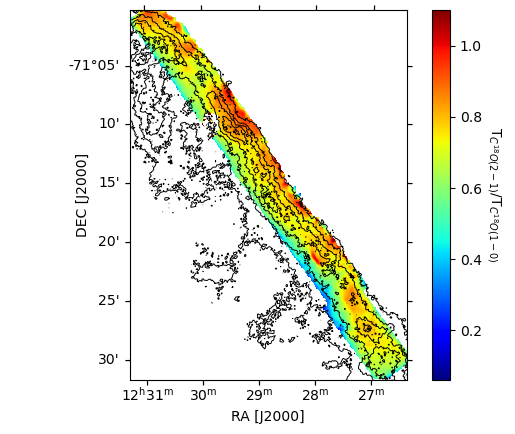

In [6]:
## plot the ratio map
map_ratio.plot_image(label_map, max_val=max_ratio, contour_hdu = hdu_3, plot_lims = [x1_pl,x2_pl,y1_pl,y2_pl], levs_cont = levs_cont, wids_cont = wids_cont, save_path = path_ratio_map_fig)

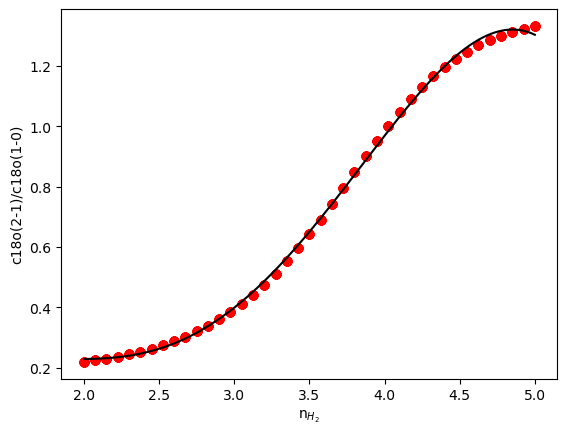

The minimal ratio that allows a solution for the give input is: 0.23
The maximal ratio that allows a solution for the give input is: 1.32


Set OBSGEO-B to   -23.022886 from OBSGEO-[XYZ].
Set OBSGEO-H to     5053.796 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


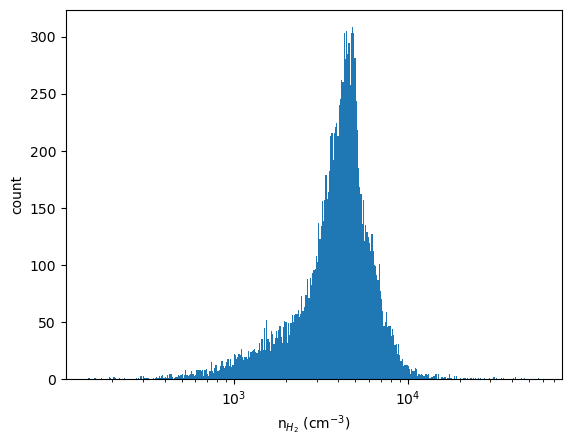

In [7]:
## derive density for given temperature and column density
map_density = map_ratio.get_density_ratio_single_temperature(mol, line_1, line_2, mol_col_dens, t_kin, fwhm, poly_order = fit_order, log_bool = False, save_path_hist = path_density_hist_fig, save_path_ratio = path_dens_ratio_curve_fig)

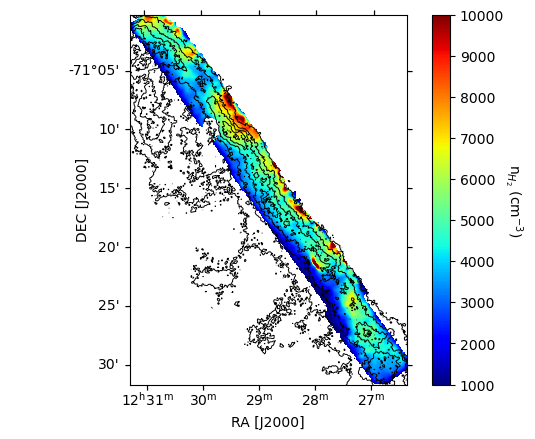

In [8]:
## plot the density map with the contours
map_density.plot_image(label_density, min_val = min_dens, max_val = max_dens, contour_hdu = hdu_3, plot_lims = [x1_pl,x2_pl,y1_pl,y2_pl], levs_cont = levs_cont, wids_cont = wids_cont, save_path = path_density_map_fig)

In [9]:
## save the density map to a fits format
map_density.save_fits(path_save_ratio_fits, name_density_fits, BUNIT_label = label_density)